# IST 718 - FINAL PROJECT  
**Author:** Sana Khan, Michael Morrey, Ryan Tervo      
**Date:**   27 Mar 2023

##   PURPOSE
This program meets the requirements for the Final Project, IST 718.  
It will read in 2019 U.S. Flight data to determine if the  one time or late.  light Kaggle Movie Dataset and attempt to classify the sentiment using MNB and SVM model.


OBJECTIVE:
1. Demonstrate ability to combine data sets and produce meaningful analysis. 
2. Provide decision maker with more than just data – give insights, understanding, and wisdom. 
3. Demonstrate progress (or mastery) of learning objectives 1, 2, 3, 4, and 5:

Tried to a single model but discovered a collection of models work best.



In [ ]:
############################################################################################

# PART 1:  Initial Setup  


In [1]:
############################################################################################
#   IMPORT LIBRARIES:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import statistics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

import sklearn
from   sklearn.naive_bayes     import GaussianNB
from   sklearn.metrics         import accuracy_score
from   sklearn.metrics         import recall_score
from   sklearn.metrics         import precision_score
from   sklearn.metrics         import f1_score
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.datasets        import fetch_openml
from   sklearn.utils           import check_random_state
from   sklearn.model_selection import train_test_split
from   sklearn.ensemble        import RandomForestClassifier 
from   sklearn.metrics         import classification_report
from   sklearn.linear_model    import LogisticRegression
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.svm             import SVC
from   sklearn.neighbors         import KNeighborsClassifier
from   sklearn.naive_bayes import GaussianNB


############################################################################################
#   SET PARAMETERS:
pd.set_option('display.max_rows',    500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',       1000)


############################################################################################
#   IMPORT DATA:
df0  = pd.read_csv('full_data_flightdelay.csv', low_memory = False)
df0a = pd.read_csv('L_DEPARRBLK.csv',          low_memory = False)


############################################################################################
#   MERGE DATA:
df1 = df0.copy()

#   Merging in Departure Time blocks
df1 = pd.merge(df0, df0a, how = 'left', left_on = 'DEP_TIME_BLK', right_on = 'Code')
df1.head()

#   Dropping Code column
columns_to_drop = df1[['Code']]
df1 = df1.drop(columns_to_drop, axis = 1)
df1.head()

#   Renaming new columns
df1.rename({'Description': 'DepartureHour'}, axis = 1, inplace = True)
df1.head()


#############################################################################################
#   UPDATE MONTH DATA:
#   Creatin df for names of months
MonthName = []

for row in df1['MONTH']:
    if row == 1:
        MonthName.append('January')
    elif row == 2:
        MonthName.append('February')
    elif row == 3:
        MonthName.append('March')
    elif row == 4:
        MonthName.append('April')
    elif row == 5:
        MonthName.append('May')
    elif row == 6:
        MonthName.append('June')
    elif row == 7:
        MonthName.append('July')
    elif row == 8:
        MonthName.append('August')
    elif row == 9:
        MonthName.append('September')
    elif row == 10:
        MonthName.append('October')
    elif row == 11:
        MonthName.append('November')
    else:
        MonthName.append('December')

#    UPDATE DATAFRAME
df1['MonthName'] = MonthName
df1


##########################################################################
#   UPDATE DAY OF THE WEEK:
DayOfWeekName = []

for row in df1['DAY_OF_WEEK']:
    if row == 1:
        DayOfWeekName.append('Sunday')
    elif row == 2:
        DayOfWeekName.append('Monday')
    elif row == 3:
        DayOfWeekName.append('Tuesday')
    elif row == 4:
        DayOfWeekName.append('Wednesday')
    elif row == 5:
        DayOfWeekName.append('Thursday')
    elif row == 6:
        DayOfWeekName.append('Friday')
    else:
        DayOfWeekName.append('Saturday')    
    
#   Adding Weekday column
df1['DayOfWeekName'] = DayOfWeekName

#   CREATE DELAYED COLUMN FOR VISUALS:
Delayed = []

for row in df1['DEP_DEL15']:
    if row == 1:
        Delayed.append('Delayed')
    else:
        Delayed.append('On-Time')
        
df1['Delayed'] = Delayed


############################################################################################
#   ELIMINATE NULLS
df1.isnull().sum()
df1.fillna(0, inplace = True)

print(df1.shape)
print(df1.columns)

#   CREATE BACKUP:
df2 = df1.copy()
print(df2.shape)

(6489062, 30)
Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DepartureHour', 'MonthName', 'DayOfWeekName', 'Delayed'], dtype='object')
(6489062, 30)


In [ ]:
############################################################################################

# PART 2:  Data Analysis

In [ ]:
############################################################################################

CARRIER_NAME
Alaska Airlines Inc.             39417
Allegiant Air                     8072
American Airlines Inc.          181350
American Eagle Airlines Inc.     41153
Atlantic Southeast Airlines      23004
Comair Inc.                      42687
Delta Air Lines Inc.            137361
Endeavor Air Inc.                35641
Frontier Airlines Inc.           31536
Hawaiian Airlines Inc.            6521
JetBlue Airways                  68480
Mesa Airlines Inc.               34525
Midwest Airline, Inc.            49163
SkyWest Airlines Inc.           104124
Southwest Airlines Co.          271281
Spirit Air Lines                 35585
United Air Lines Inc.           117468
Name: DEP_DEL15, dtype: int64
MONTH
1      87682
2      98036
3      96589
4      98757
5     113530
6     135871
7     123238
8     119411
9      72834
10     90745
11     75576
12    115099
Name: DEP_DEL15, dtype: int64


C:\Users\mikey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


test


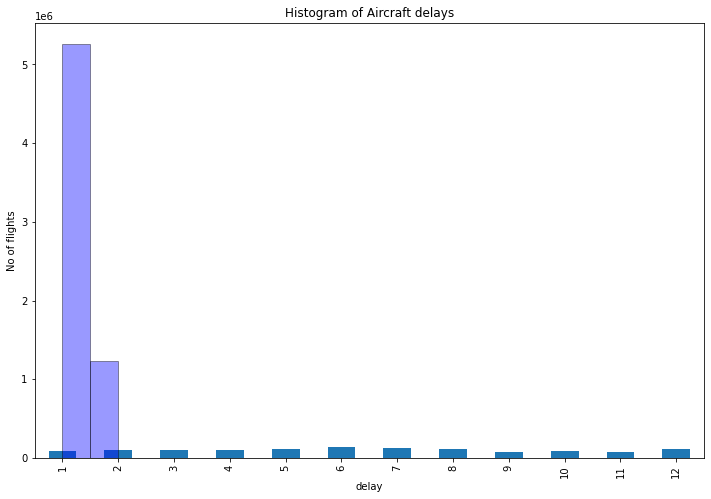

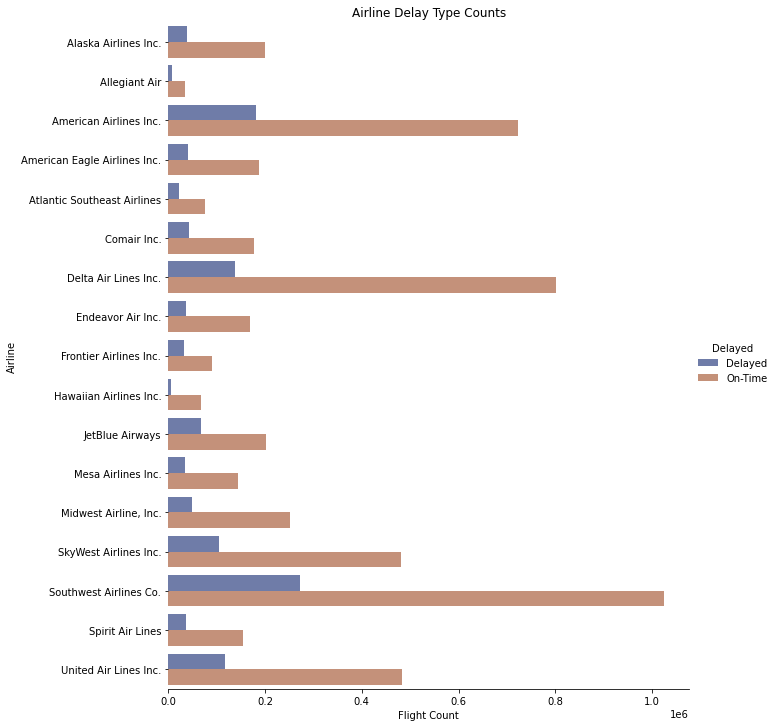

In [2]:
#   CREATE BACKUP:
df2 = df1.copy()
df_aircraft = df2.copy()

#   Delayed flight count by airline
Delayed = df2.groupby(['CARRIER_NAME'])['DEP_DEL15'].sum()
print(Delayed)

#   Delayed flight count by airline and month
DelayedMonth = df2.groupby(['MONTH'])['DEP_DEL15'].sum()
print(DelayedMonth)

#   Delayed airlines by month barplot
Months = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

DelayedMonth.plot.bar(figsize=(12, 8))

#   Delayed Histogram of delayed or on time
sns.distplot(df2["DEP_DEL15"] , color = "blue" , kde = False
            , bins = 2, hist_kws = {"edgecolor": "black"}
            , hist = True)
plt.title("Histogram of Aircraft delays")
plt.xlabel("delay")
plt.ylabel("No of flights")

df2.head()        
print('test')

#   Getting sums by delay group and airline
airline_delay_plot = df2[['CARRIER_NAME', 'Delayed', 'DEP_DEL15']]
airline_delay_plot = airline_delay_plot.groupby(['CARRIER_NAME', 'Delayed']).count()

airline_delay_plot = airline_delay_plot.reset_index()

airline_delay_plot

#Plotting
DelayMinPlot = sns.catplot(
    data=airline_delay_plot, kind="bar",
    x="DEP_DEL15", y="CARRIER_NAME", hue="Delayed", palette="dark", alpha=.6, height=10
)
DelayMinPlot.despine(left=True)
DelayMinPlot.set_axis_labels("Flight Count", "Airline")
DelayMinPlot.set(title="Airline Delay Type Counts")



<AxesSubplot:xlabel='MONTH'>

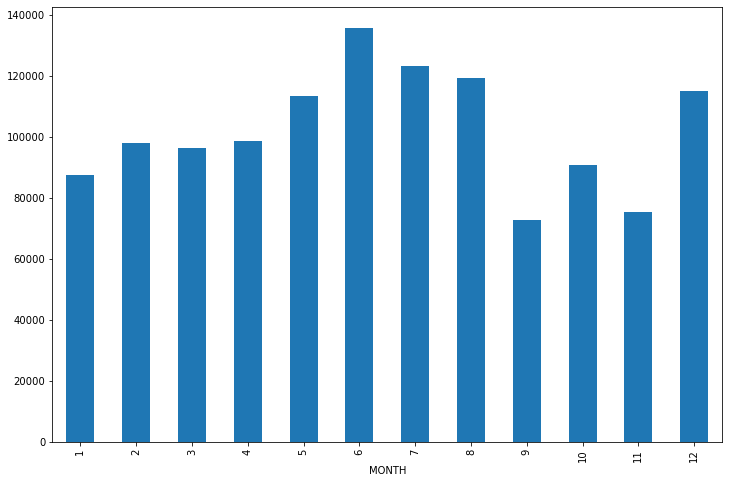

In [3]:
DelayedMonth.plot.bar(figsize=(12,8))

### EDA

### What are the on-time/delayed counts per airline?

### Which airports are the busiest?

In [4]:
df_aircraft.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,DepartureHour,MonthName,DayOfWeekName,Delayed
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,8:00AM to 8:59AM,January,Saturday,On-Time
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,7:00AM to 7:59AM,January,Saturday,On-Time
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6:00AM to 6:59AM,January,Saturday,On-Time
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6:00AM to 6:59AM,January,Saturday,On-Time
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,12:00AM to 5:59AM,January,Saturday,On-Time


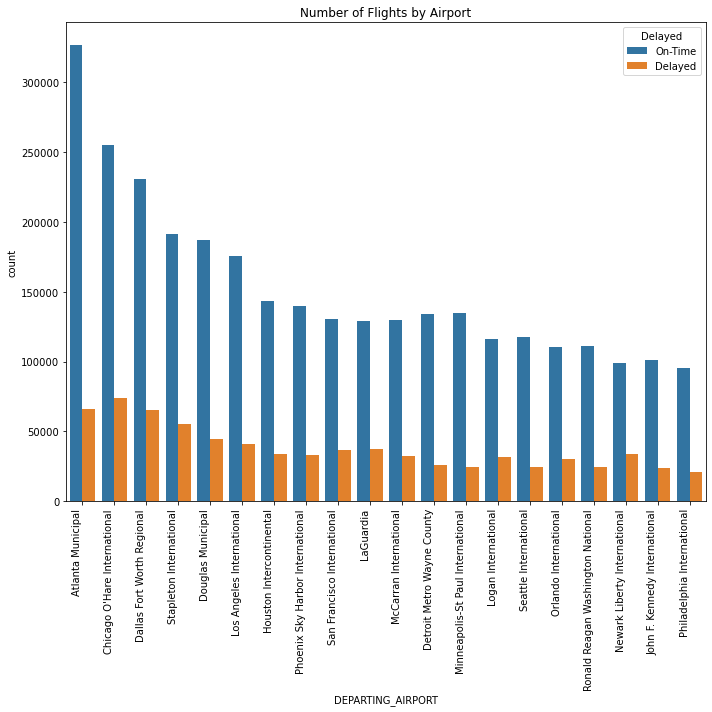

In [5]:
#Count flights - top 20 airports
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df_aircraft['DEPARTING_AIRPORT'], data = df_aircraft, hue=df_aircraft['Delayed'],
              order=df_aircraft['DEPARTING_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation = 90, ha = "right")
plt.title("Number of Flights by Airport")
plt.tight_layout()
plt.show()

### What is the percentage of total flights that were delayed per month and airline?

In [6]:
#Aggregating delayed flights by sum and count
tot_delay = df_aircraft.groupby(['MonthName', 'CARRIER_NAME'])['DEP_DEL15'].agg(['sum', 'count'])

#Resetting index
tot_delay = tot_delay.reset_index()
#Examining data types
tot_delay.dtypes

MonthName       object
CARRIER_NAME    object
sum              int64
count            int64
dtype: object

In [7]:
tot_delay = tot_delay.rename(columns={"sum":"TotalDelays","count":"TotalFlights"})

tot_delay.head(50)

,MonthName,CARRIER_NAME,TotalDelays,TotalFlights
0,April,Alaska Airlines Inc.,2530,19505
1,April,Allegiant Air,568,3332
2,April,American Airlines Inc.,14883,72510
3,April,American Eagle Airlines Inc.,2757,18667
4,April,Atlantic Southeast Airlines,1873,7849
5,April,Comair Inc.,4060,17988
6,April,Delta Air Lines Inc.,10840,77412
7,April,Endeavor Air Inc.,3217,17101
8,April,Frontier Airlines Inc.,1946,8733
9,April,Hawaiian Airlines Inc.,414,6377


In [8]:
#Getting percentage of total delays / total flights
tot_delay['DelayRatio'] = tot_delay['TotalDelays'] / tot_delay['TotalFlights']

tot_delay.head()

,MonthName,CARRIER_NAME,TotalDelays,TotalFlights,DelayRatio
0,April,Alaska Airlines Inc.,2530,19505,0.129710
1,April,Allegiant Air,568,3332,0.170468
2,April,American Airlines Inc.,14883,72510,0.205254
3,April,American Eagle Airlines Inc.,2757,18667,0.147694
4,April,Atlantic Southeast Airlines,1873,7849,0.238629


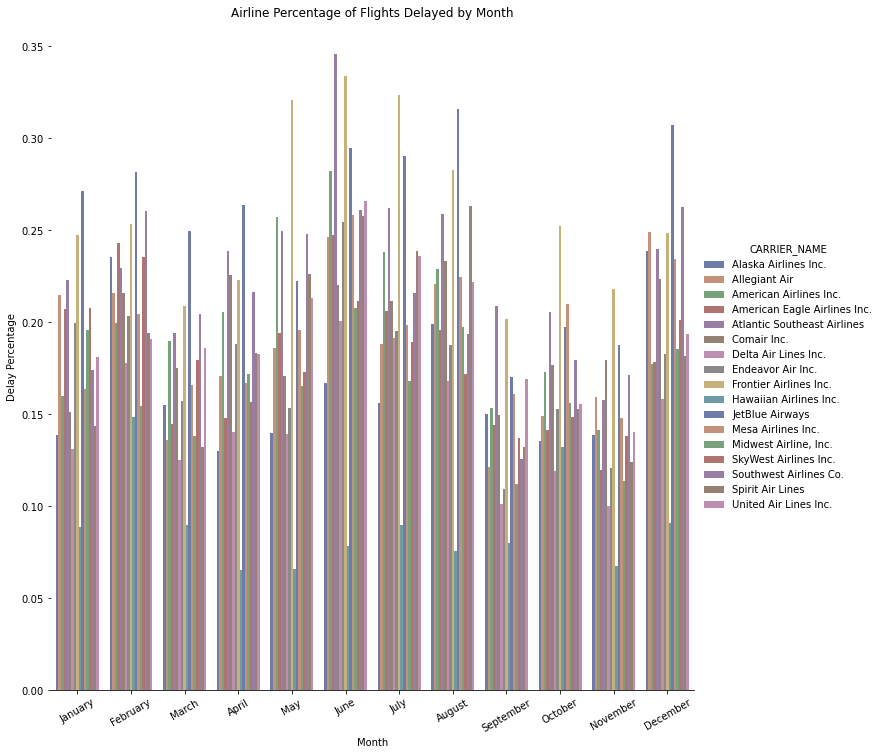

In [9]:
#Plotting % of flights delayed by month/airline
monthPlot = sns.catplot(
    data=tot_delay, kind="bar",
    x="MonthName", y="DelayRatio", order=Months, hue="CARRIER_NAME", palette="dark", alpha=.6, height=10
)
monthPlot.despine(left=True)
monthPlot.set_axis_labels("Month", "Delay Percentage")
monthPlot.set(title="Airline Percentage of Flights Delayed by Month")
monthPlot.set_xticklabels(rotation=30)

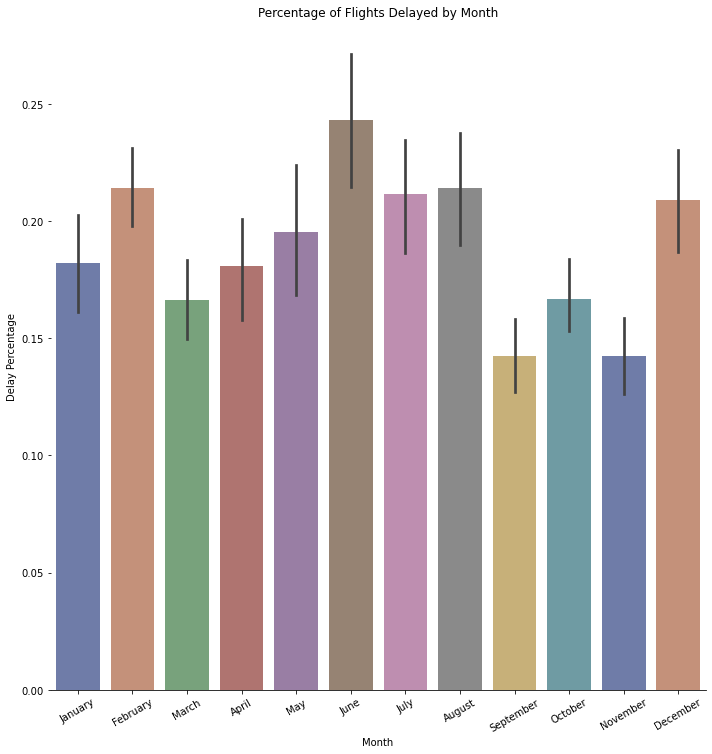

In [10]:
#Plotting % of flights delayed by month
monthPlot = sns.catplot(
    data=tot_delay, kind="bar",
    x="MonthName", y="DelayRatio", order=Months, palette="dark", alpha=.6, height=10
)
monthPlot.despine(left=True)
monthPlot.set_axis_labels("Month", "Delay Percentage")
monthPlot.set(title="Percentage of Flights Delayed by Month")
monthPlot.set_xticklabels(rotation=30)

In [11]:
#Getting aggregate by airline summing total delays and flights
df_airlineDelayRatio = tot_delay.groupby(['CARRIER_NAME']).agg({'TotalDelays':'sum','TotalFlights':'sum'})
#Resetting index
df_airlineDelayRatio = df_airlineDelayRatio.reset_index()

df_airlineDelayRatio.head()

,CARRIER_NAME,TotalDelays,TotalFlights
0,Alaska Airlines Inc.,39417,239337
1,Allegiant Air,8072,42636
2,American Airlines Inc.,181350,903640
3,American Eagle Airlines Inc.,41153,228792
4,Atlantic Southeast Airlines,23004,99044


In [12]:
#Getting delay ratio
df_airlineDelayRatio['DelayRatio'] = df_airlineDelayRatio['TotalDelays'] / df_airlineDelayRatio['TotalFlights']

df_airlineDelayRatio.head()

,CARRIER_NAME,TotalDelays,TotalFlights,DelayRatio
0,Alaska Airlines Inc.,39417,239337,0.164692
1,Allegiant Air,8072,42636,0.189324
2,American Airlines Inc.,181350,903640,0.200688
3,American Eagle Airlines Inc.,41153,228792,0.179871
4,Atlantic Southeast Airlines,23004,99044,0.232260


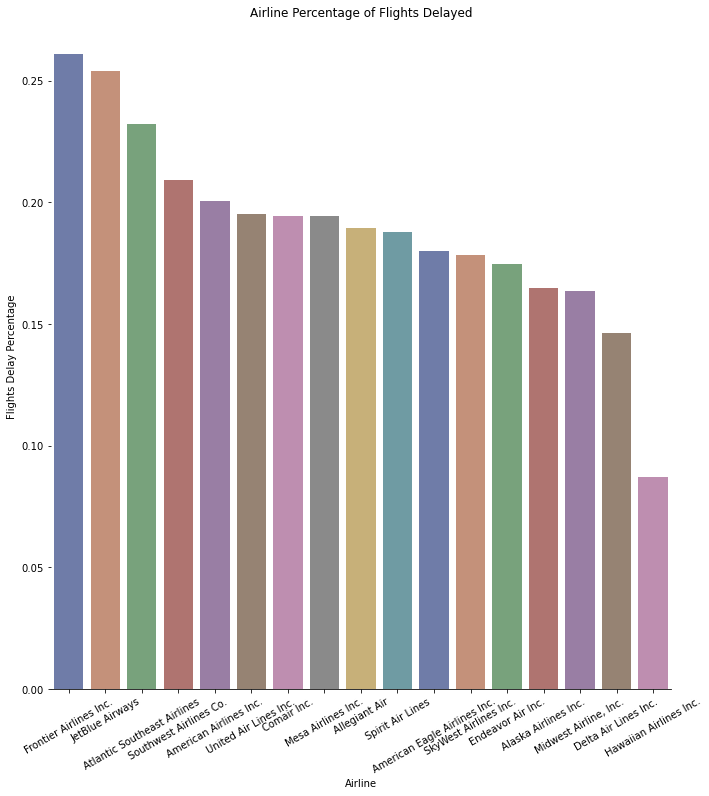

In [13]:
#Plotting percentage of flights delayed by airline
AirDelay = sns.catplot(
    data=df_airlineDelayRatio, kind="bar", 
    order=df_airlineDelayRatio.sort_values('DelayRatio', ascending=False).CARRIER_NAME,
    x="CARRIER_NAME", y="DelayRatio", palette="dark", alpha=.6, height=10
)
AirDelay.despine(left=True)
AirDelay.set_axis_labels("Airline", "Flights Delay Percentage")
AirDelay.set(title="Airline Percentage of Flights Delayed")
AirDelay.set_xticklabels(rotation=30)

### What is the trend for total delays and delay ratio over time?

In [14]:
series_delay = df_aircraft[['MONTH', 'MonthName', 'CARRIER_NAME', 'DEP_DEL15']]
series_delay['MONTH'] = series_delay['MONTH'].astype(str)
series_delay.head()

C:\Users\mikey\AppData\Local\Temp\ipykernel_20180\859293274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_delay['MONTH'] = series_delay['MONTH'].astype(str)


,MONTH,MonthName,CARRIER_NAME,DEP_DEL15
0,1,January,Southwest Airlines Co.,0
1,1,January,Delta Air Lines Inc.,0
2,1,January,Delta Air Lines Inc.,0
3,1,January,Delta Air Lines Inc.,0
4,1,January,Spirit Air Lines,0


In [15]:
series_delay.dtypes

MONTH           object
MonthName       object
CARRIER_NAME    object
DEP_DEL15        int64
dtype: object

In [16]:
#Aggregating delayed flights by sum and count
series_delay = series_delay.groupby(['MONTH', 'MonthName', 'CARRIER_NAME'])['DEP_DEL15'].agg(['sum', 'count'])

#Resetting index
series_delay = series_delay.reset_index()
#Examining data types
series_delay.dtypes

MONTH           object
MonthName       object
CARRIER_NAME    object
sum              int64
count            int64
dtype: object

In [17]:
series_delay = series_delay.rename(columns={"sum":"TotalDelays","count":"TotalFlights"})

series_delay.head()

,MONTH,MonthName,CARRIER_NAME,TotalDelays,TotalFlights
0,1,January,Alaska Airlines Inc.,2579,18620
1,1,January,Allegiant Air,501,2331
2,1,January,American Airlines Inc.,11708,73401
3,1,January,American Eagle Airlines Inc.,3497,16885
4,1,January,Atlantic Southeast Airlines,2038,9135


In [18]:
#Getting percentage of total delays / total flights
series_delay['DelayRatio'] = series_delay['TotalDelays'] / series_delay['TotalFlights']

series_delay.head()

,MONTH,MonthName,CARRIER_NAME,TotalDelays,TotalFlights,DelayRatio
0,1,January,Alaska Airlines Inc.,2579,18620,0.138507
1,1,January,Allegiant Air,501,2331,0.214929
2,1,January,American Airlines Inc.,11708,73401,0.159507
3,1,January,American Eagle Airlines Inc.,3497,16885,0.207107
4,1,January,Atlantic Southeast Airlines,2038,9135,0.223098


In [19]:
#Converting MONTH back to int for timeseries order
series_delay['MONTH'] = series_delay['MONTH'].astype(int)

In [20]:
#Melt delay columns
series_delay_2 = series_delay[['MONTH', 'MonthName', 'CARRIER_NAME', 'TotalDelays', 'TotalFlights']]
series_delay_2 = pd.melt(series_delay, id_vars=['MONTH', 'MonthName', 'CARRIER_NAME'], 
        value_vars=['TotalDelays', 'TotalFlights'],
        var_name='DelayType', value_name='DelayMinutes')

series_delay_2

,MONTH,MonthName,CARRIER_NAME,DelayType,DelayMinutes
0,1,January,Alaska Airlines Inc.,TotalDelays,2579
1,1,January,Allegiant Air,TotalDelays,501
2,1,January,American Airlines Inc.,TotalDelays,11708
3,1,January,American Eagle Airlines Inc.,TotalDelays,3497
4,1,January,Atlantic Southeast Airlines,TotalDelays,2038
5,1,January,Comair Inc.,TotalDelays,2531
6,1,January,Delta Air Lines Inc.,TotalDelays,9055
7,1,January,Endeavor Air Inc.,TotalDelays,3133
8,1,January,Frontier Airlines Inc.,TotalDelays,2120
9,1,January,Hawaiian Airlines Inc.,TotalDelays,561


Text(0.5, 1.0, 'Percentage of Flights Delayed Over 2019')

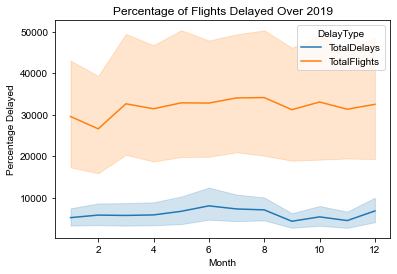

In [21]:
#Line plot for percentage of flight delays
MonthlyDelays = sns.lineplot(x="MONTH", y="DelayMinutes", hue='DelayType',
             data=series_delay_2)
sns.set(rc={"figure.figsize":(20, 10)})
plt.xlabel('Month')
plt.ylabel('Percentage Delayed')
plt.title('Percentage of Flights Delayed Over 2019')

Text(0.5, 1.0, 'Percentages of Flights Delayed Over 2019 by Airline')

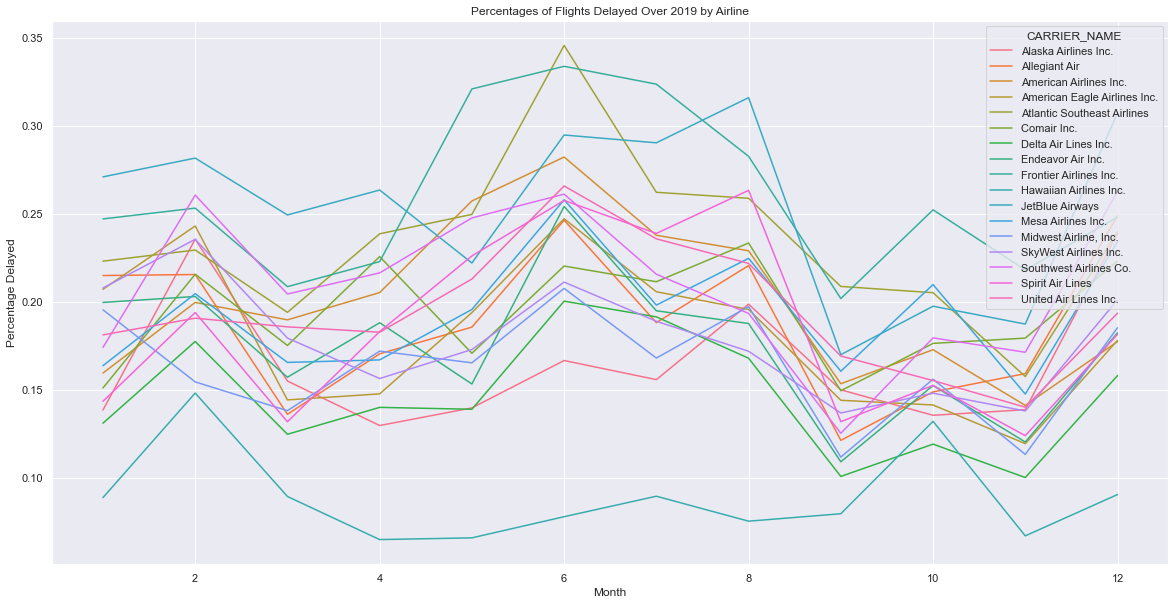

In [22]:
#Line plot for total flight delays
MonthlyDelays = sns.lineplot(x="MONTH", y="DelayRatio", hue='CARRIER_NAME',
             data=series_delay)
sns.set(rc={"figure.figsize":(20, 10)})
plt.xlabel('Month')
plt.ylabel('Percentage Delayed')
plt.title('Percentages of Flights Delayed Over 2019 by Airline')

### What are the average delay minutes and delayed fight ratios by hour of the day?

In [30]:
#New dataframe for delays by departure hour
df_depHr = df_aircraft[['DepartureHour', 'CARRIER_NAME', 'DEP_DEL15']]


df_depHr.head()

,DepartureHour,CARRIER_NAME,DEP_DEL15
0,8:00AM to 8:59AM,Southwest Airlines Co.,0
1,7:00AM to 7:59AM,Delta Air Lines Inc.,0
2,6:00AM to 6:59AM,Delta Air Lines Inc.,0
3,6:00AM to 6:59AM,Delta Air Lines Inc.,0
4,12:00AM to 5:59AM,Spirit Air Lines,0


In [31]:
#Aggregate by departure hour and airline, get sum and counts
df_depHr = df_depHr.groupby(['DepartureHour', 'CARRIER_NAME'])['DEP_DEL15'].agg(['sum', 'count'])
#Reset index
df_depHr = df_depHr.reset_index()

##Adding in column for ratio
df_depHr = df_depHr.rename(columns={"sum":"TotalDelays","count":"TotalFlights"})
df_depHr['DelayRatio'] = df_depHr['TotalDelays'] / df_depHr['TotalFlights']
df_depHr.head()

,DepartureHour,CARRIER_NAME,TotalDelays,TotalFlights,DelayRatio
0,10:00AM to 10:59AM,Alaska Airlines Inc.,2331,13205,0.176524
1,10:00AM to 10:59AM,Allegiant Air,324,2413,0.134273
2,10:00AM to 10:59AM,American Airlines Inc.,10146,58370,0.173822
3,10:00AM to 10:59AM,American Eagle Airlines Inc.,2436,16031,0.151956
4,10:00AM to 10:59AM,Atlantic Southeast Airlines,1321,8103,0.163026


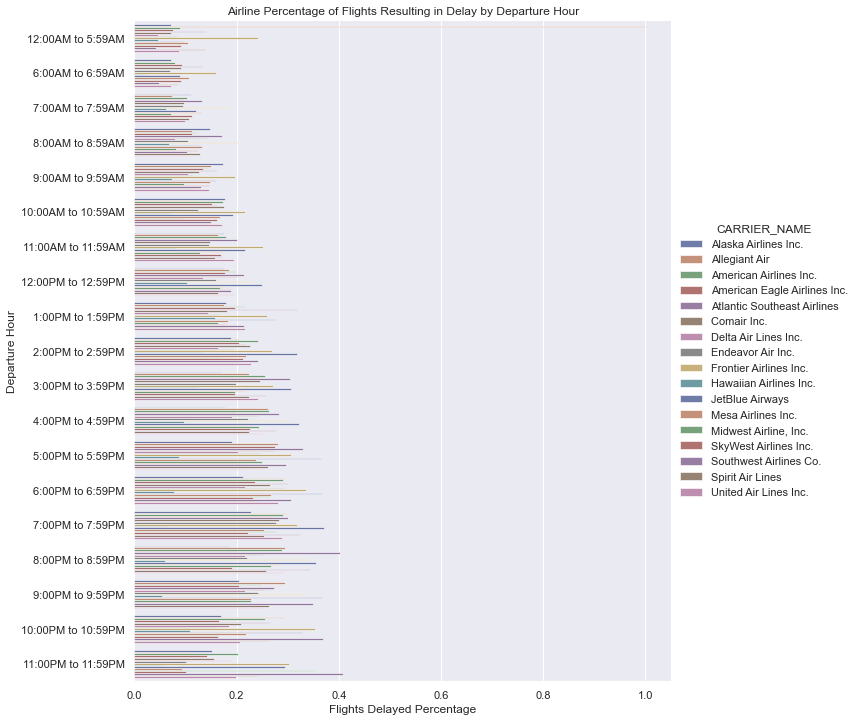

In [28]:
#Variations in airline delayed minutes
DepHrs = ['12:00AM to 5:59AM', '6:00AM to 6:59AM', '7:00AM to 7:59AM', '8:00AM to 8:59AM', '9:00AM to 9:59AM',
         '10:00AM to 10:59AM', '11:00AM to 11:59AM', '12:00PM to 12:59PM', '1:00PM to 1:59PM', '2:00PM to 2:59PM',
         '3:00PM to 3:59PM', '4:00PM to 4:59PM', '5:00PM to 5:59PM', '6:00PM to 6:59PM', '7:00PM to 7:59PM',
         '8:00PM to 8:59PM', '9:00PM to 9:59PM', '10:00PM to 10:59PM', '11:00PM to 11:59PM']


#Departure hour flight delay percentage
DelayMinPlot = sns.catplot(
    data=df_depHr, kind="bar",
    x="DelayRatio", y="DepartureHour", order=DepHrs, hue="CARRIER_NAME", palette="dark", alpha=.6, height=10
)
DelayMinPlot.despine(left=True)
DelayMinPlot.set_axis_labels("Flights Delayed Percentage", "Departure Hour")
DelayMinPlot.set(title="Airline Percentage of Flights Resulting in Delay by Departure Hour")

In [32]:
#Filtering by 3 airlines
#Limiting to only 6 decided upon airlines
df_depHr = df_depHr.loc[(df_depHr['CARRIER_NAME'] == 'Southwest Airlines Co.') | #Delta
                          (df_depHr['CARRIER_NAME'] == 'Frontier Airlines Inc.') | #Frontier
                          (df_depHr['CARRIER_NAME'] == 'JetBlue Airways')] #JetBlue


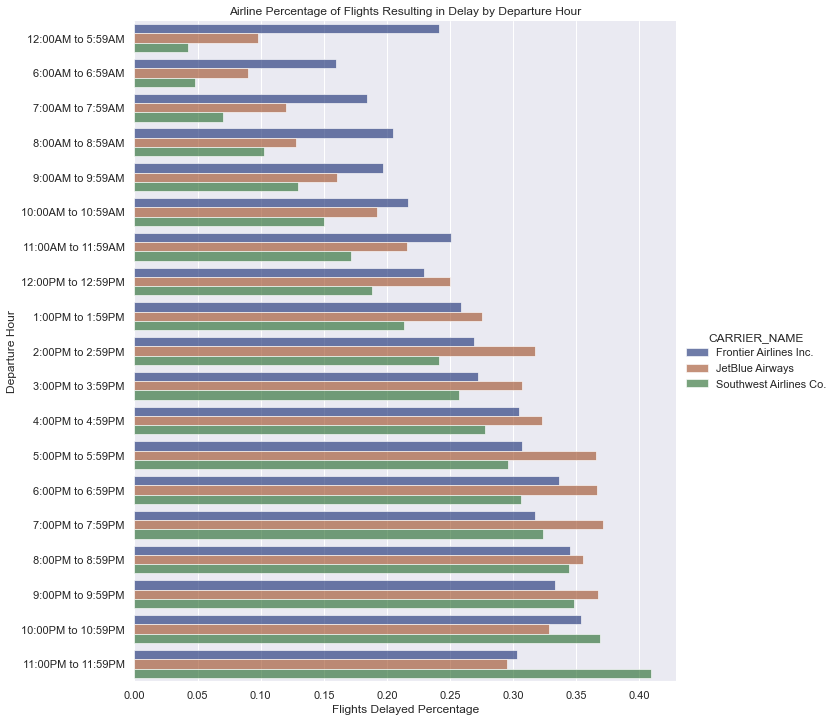

In [33]:
#Variations in airline delayed minutes
DepHrs = ['12:00AM to 5:59AM', '6:00AM to 6:59AM', '7:00AM to 7:59AM', '8:00AM to 8:59AM', '9:00AM to 9:59AM',
         '10:00AM to 10:59AM', '11:00AM to 11:59AM', '12:00PM to 12:59PM', '1:00PM to 1:59PM', '2:00PM to 2:59PM',
         '3:00PM to 3:59PM', '4:00PM to 4:59PM', '5:00PM to 5:59PM', '6:00PM to 6:59PM', '7:00PM to 7:59PM',
         '8:00PM to 8:59PM', '9:00PM to 9:59PM', '10:00PM to 10:59PM', '11:00PM to 11:59PM']


#Departure hour flight delay percentage
DelayMinPlot = sns.catplot(
    data=df_depHr, kind="bar",
    x="DelayRatio", y="DepartureHour", order=DepHrs, hue="CARRIER_NAME", palette="dark", alpha=.6, height=10
)
DelayMinPlot.despine(left=True)
DelayMinPlot.set_axis_labels("Flights Delayed Percentage", "Departure Hour")
DelayMinPlot.set(title="Airline Percentage of Flights Resulting in Delay by Departure Hour")

In [34]:
df_aircraft.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

### Which days of week from the busiest airports have the most delays?

In [35]:
#New dataframe for delays by airport and day of week
df_airport_weekday = df_aircraft[['CARRIER_NAME', 'DEPARTING_AIRPORT', 'DayOfWeekName', 'DEP_DEL15']]

df_airport_weekday.head()

,CARRIER_NAME,DEPARTING_AIRPORT,DayOfWeekName,DEP_DEL15
0,Southwest Airlines Co.,McCarran International,Saturday,0
1,Delta Air Lines Inc.,McCarran International,Saturday,0
2,Delta Air Lines Inc.,McCarran International,Saturday,0
3,Delta Air Lines Inc.,McCarran International,Saturday,0
4,Spirit Air Lines,McCarran International,Saturday,0


In [36]:
#Filtering by 20 busiest cities
df_airport_weekday = df_airport_weekday.loc[(df_airport_weekday['DEPARTING_AIRPORT'] == 'Atlanta Municipal') | 
                          (df_airport_weekday['DEPARTING_AIRPORT'] == 'Stapleton International') | 
                          (df_airport_weekday['DEPARTING_AIRPORT'] == 'Dallas Fort Worth Regional') |
                          (df_airport_weekday['DEPARTING_AIRPORT'] == "Chicago O'Hare International") | 
                          (df_airport_weekday['DEPARTING_AIRPORT'] == 'Los Angeles International')] 

In [37]:
df_airport_weekday.DEPARTING_AIRPORT.unique()

array(["Chicago O'Hare International", 'Los Angeles International',
       'Atlanta Municipal', 'Stapleton International',
       'Dallas Fort Worth Regional'], dtype=object)

In [38]:
#Aggregate by departure hour and airline, get sum and counts
df_airport_weekdayRatio = df_airport_weekday.groupby(['DEPARTING_AIRPORT', 'DayOfWeekName'])['DEP_DEL15'].agg(['sum', 'count'])
#Reset index
df_airport_weekdayRatio = df_airport_weekdayRatio.reset_index()

##Adding in column for ratio
df_airport_weekdayRatio = df_airport_weekdayRatio.rename(columns={"sum":"TotalDelays","count":"TotalFlights"})
df_airport_weekdayRatio['DelayRatio'] = df_airport_weekdayRatio['TotalDelays'] / df_airport_weekdayRatio['TotalFlights']
df_airport_weekdayRatio.head()

,DEPARTING_AIRPORT,DayOfWeekName,TotalDelays,TotalFlights,DelayRatio
0,Atlanta Municipal,Friday,7162,44837,0.159734
1,Atlanta Municipal,Monday,8784,58283,0.150713
2,Atlanta Municipal,Saturday,10004,55114,0.181515
3,Atlanta Municipal,Sunday,9366,59232,0.158124
4,Atlanta Municipal,Thursday,10743,58663,0.183131


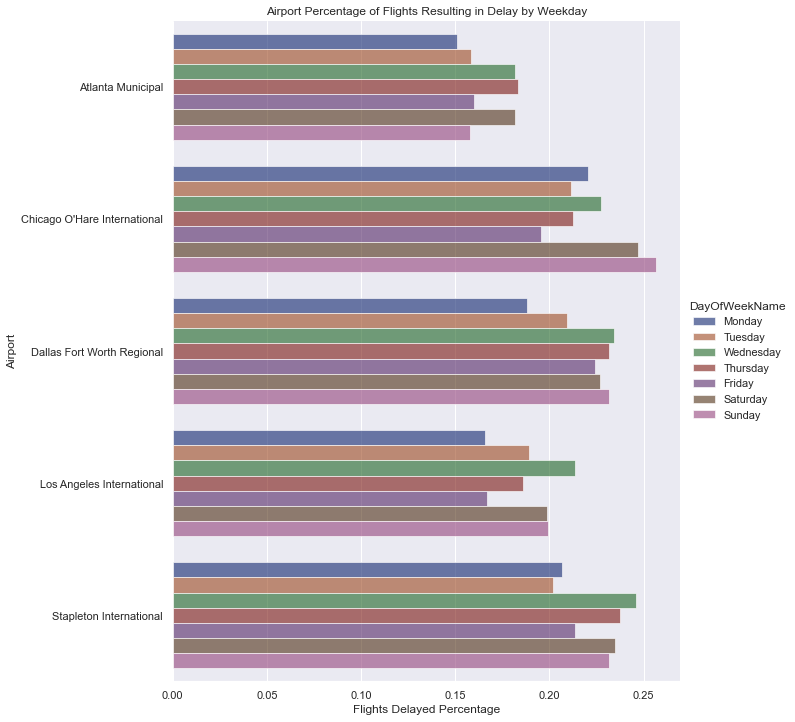

In [39]:
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Plotting 
DelayMinPlot = sns.catplot(
    data=df_airport_weekdayRatio, kind="bar",
    x="DelayRatio", y="DEPARTING_AIRPORT", hue="DayOfWeekName", hue_order=Days, palette="dark", alpha=.6, height=10
)
DelayMinPlot.despine(left=True)
DelayMinPlot.set_axis_labels("Flights Delayed Percentage", "Airport")
DelayMinPlot.set(title="Airport Percentage of Flights Resulting in Delay by Weekday")

In [40]:
#Aggregate by departure hour and airline, get sum and counts
df_airport_weekday2 = df_airport_weekday.groupby(['DayOfWeekName'])['DEP_DEL15'].agg(['sum', 'count'])
#Reset index
df_airport_weekday2 = df_airport_weekday2.reset_index()

##Adding in column for ratio
df_airport_weekday2 = df_airport_weekday2.rename(columns={"sum":"TotalDelays","count":"TotalFlights"})
df_airport_weekday2['DelayRatio'] = df_airport_weekday2['TotalDelays'] / df_airport_weekday2['TotalFlights']
df_airport_weekday2.head()

,DayOfWeekName,TotalDelays,TotalFlights,DelayRatio
0,Friday,34399,179824,0.191293
1,Monday,40040,216353,0.185068
2,Saturday,45756,211098,0.216752
3,Sunday,47061,221315,0.212643
4,Thursday,46164,221119,0.208774


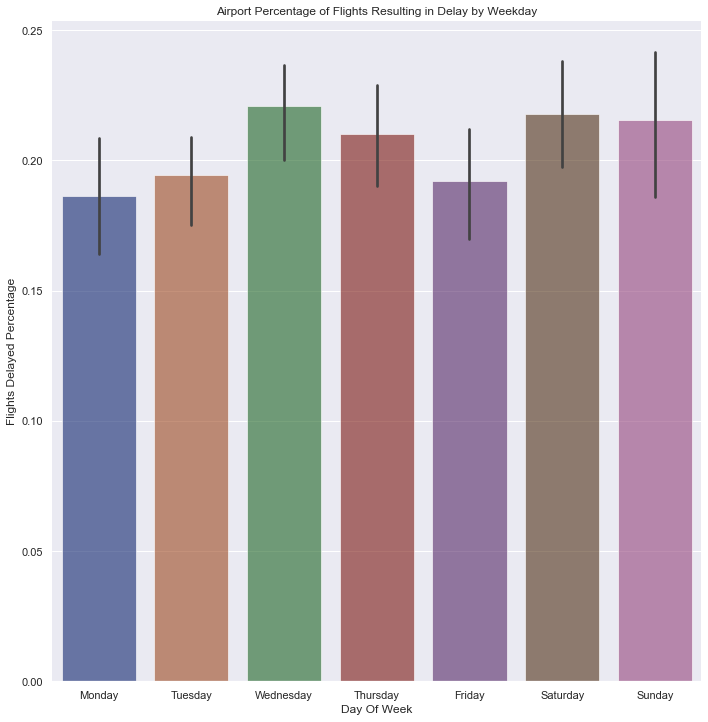

In [41]:

#Plotting 
DelayMinPlot = sns.catplot(
    data=df_airport_weekdayRatio, kind="bar",
    x="DayOfWeekName", y="DelayRatio", order=Days, palette="dark", alpha = .6, height = 10
)
DelayMinPlot.despine(left=True)
DelayMinPlot.set_axis_labels("Day Of Week", "Flights Delayed Percentage")
DelayMinPlot.set(title="Airport Percentage of Flights Resulting in Delay by Weekday")

### What are the variations in precipitation, snowfall and temperatures for delays and on-time flights?

In [42]:
df_aircraft.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,DepartureHour,MonthName,DayOfWeekName,Delayed
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,8:00AM to 8:59AM,January,Saturday,On-Time
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,7:00AM to 7:59AM,January,Saturday,On-Time
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6:00AM to 6:59AM,January,Saturday,On-Time
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,6:00AM to 6:59AM,January,Saturday,On-Time
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91,12:00AM to 5:59AM,January,Saturday,On-Time


<AxesSubplot:xlabel='PRCP', ylabel='DEP_DEL15'>

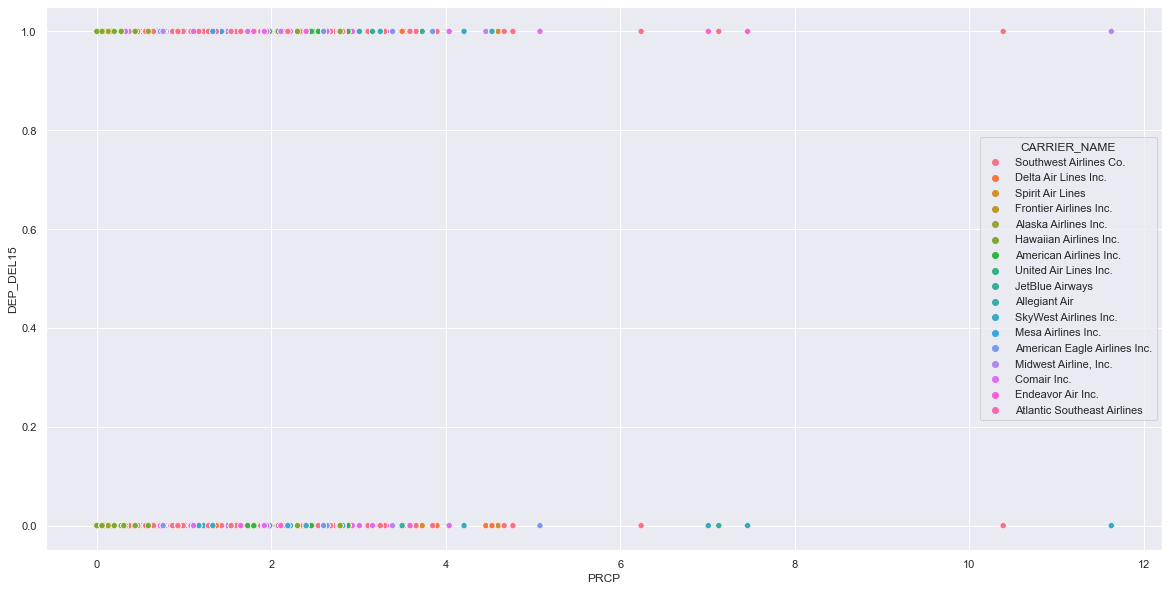

In [43]:
#Precipitation scatterplot
sns.scatterplot(data=df_aircraft, x = "PRCP", y = "DEP_DEL15", hue = 'CARRIER_NAME')

Text(0, 0.5, 'Max Temp')

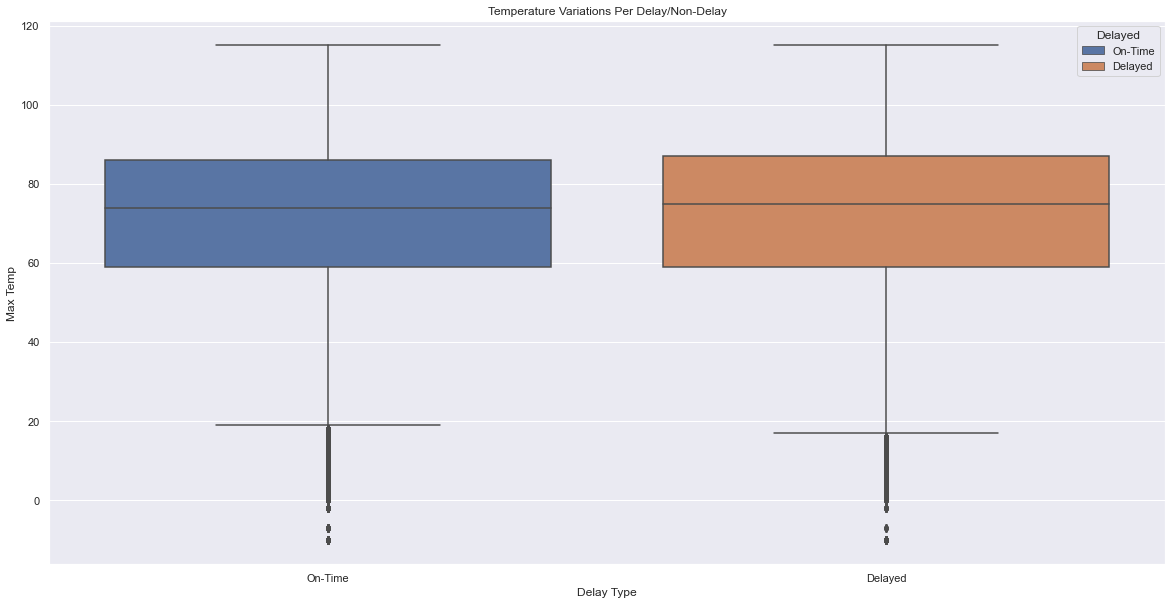

In [44]:
#Max Temp Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="TMAX", hue="Delayed", 
            dodge=False).set(title='Temperature Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Max Temp")

Text(0, 0.5, 'Max Wind Speed')

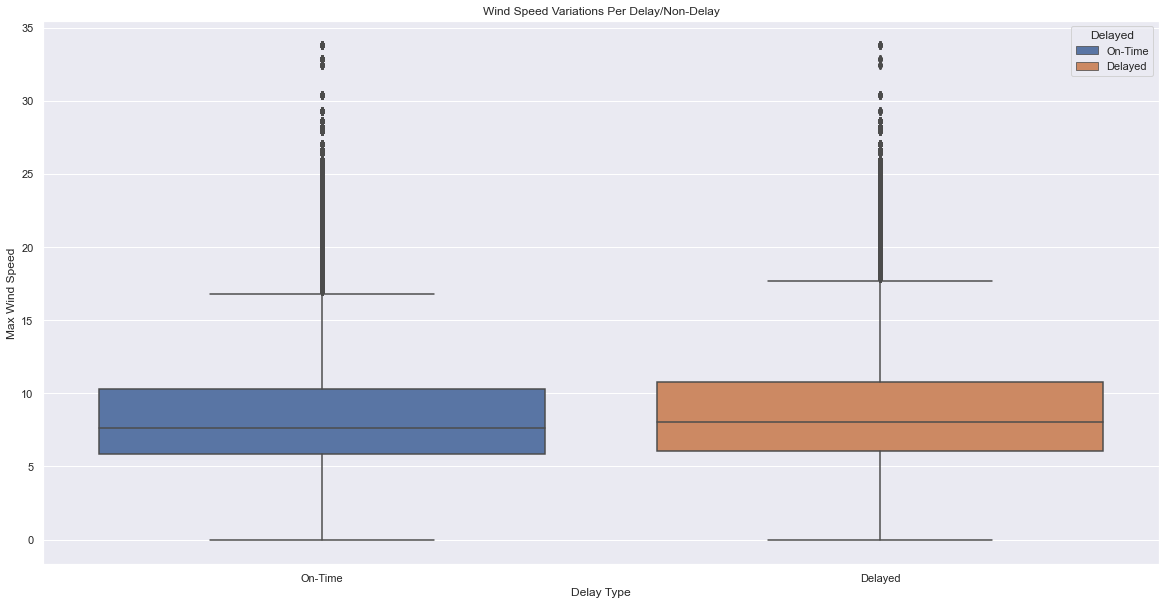

In [45]:
#Max wind speed Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="AWND", hue="Delayed", 
            dodge=False).set(title='Wind Speed Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Max Wind Speed")

Text(0, 0.5, 'Inches of Snow on Ground')

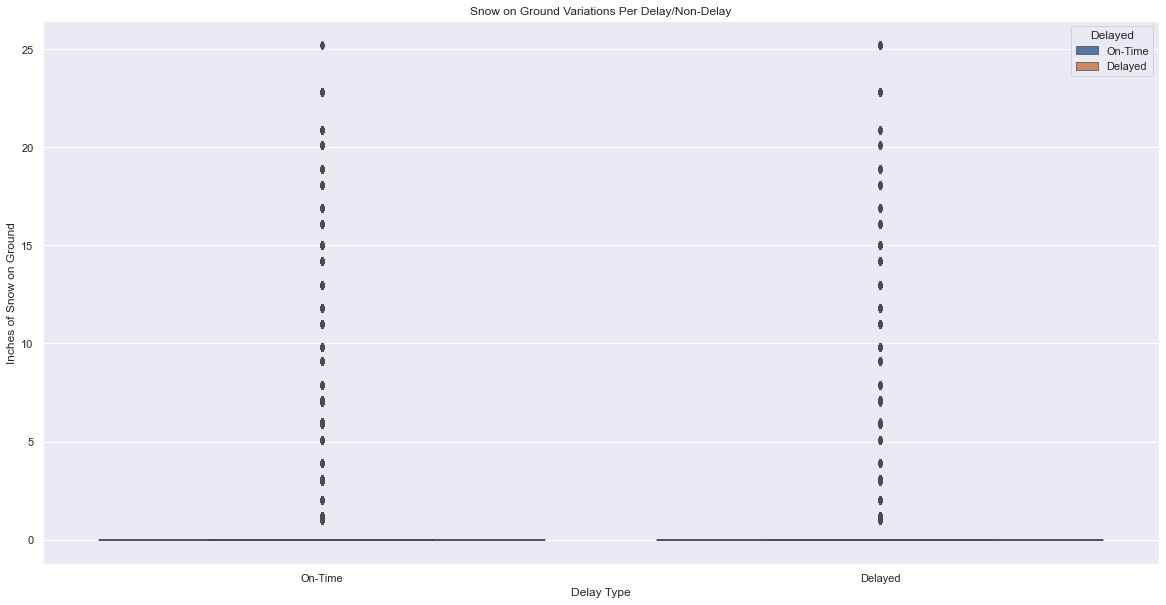

In [46]:
#Inches of Snow on ground Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="SNWD", hue="Delayed", 
            dodge=False).set(title='Snow on Ground Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Inches of Snow on Ground")

Text(0, 0.5, 'Plane Age (Year)')

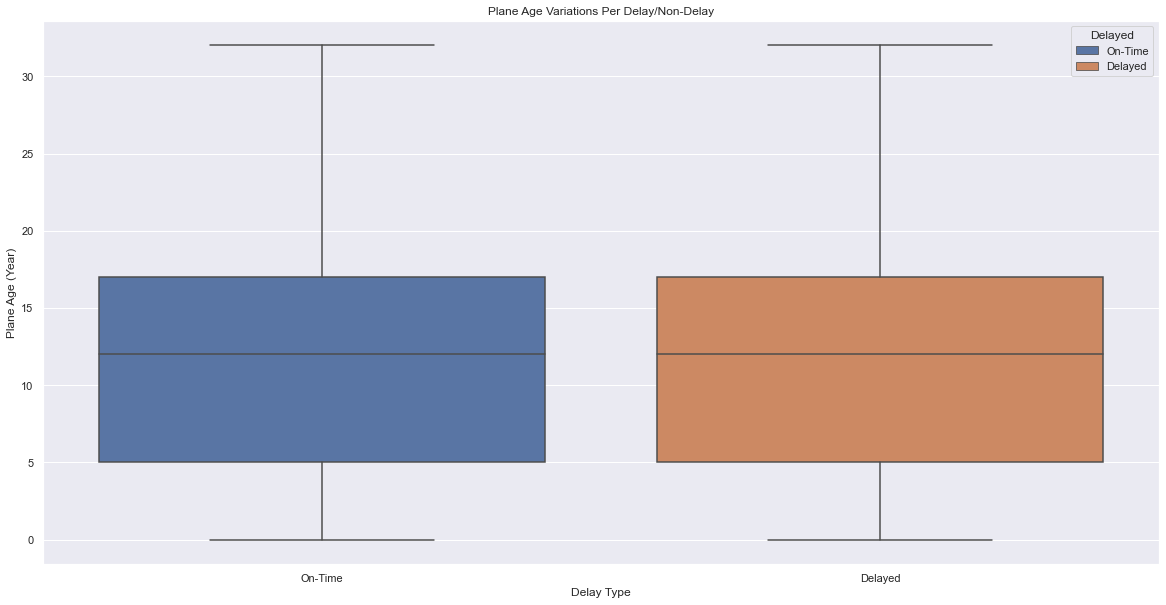

In [47]:
#Plane age Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="PLANE_AGE", hue="Delayed", 
            dodge=False).set(title='Plane Age Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Plane Age (Year)")

Text(0, 0.5, 'Number of Concurrent Flights')

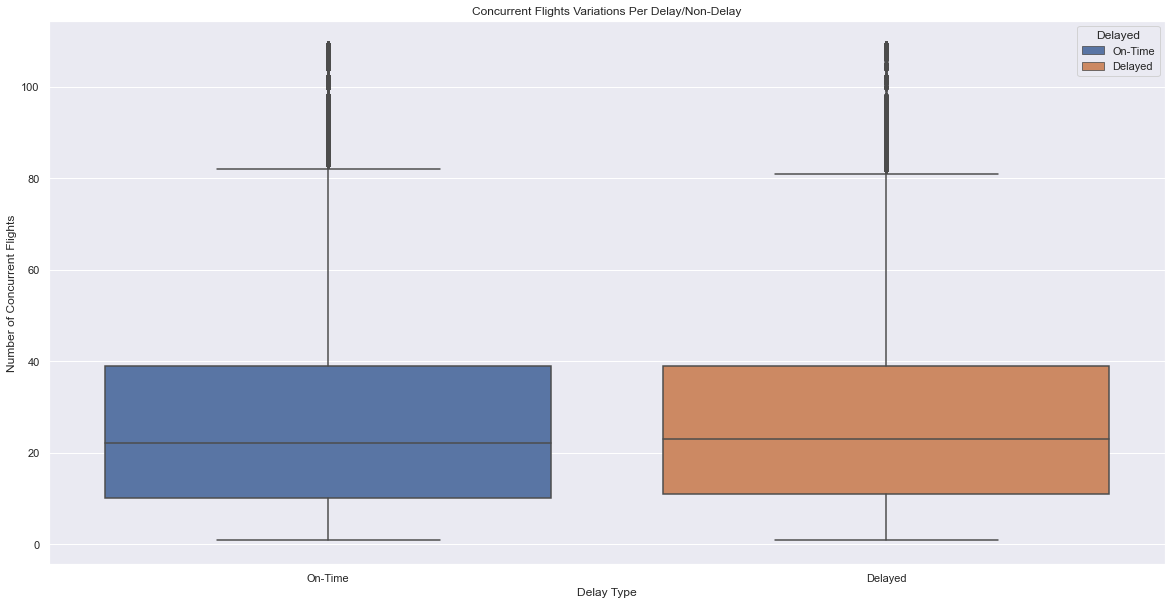

In [48]:
#Concurrent Flights Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="CONCURRENT_FLIGHTS", hue="Delayed", 
            dodge=False).set(title='Concurrent Flights Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Number of Concurrent Flights")

Text(0, 0.5, 'Total Precipitation Inches')

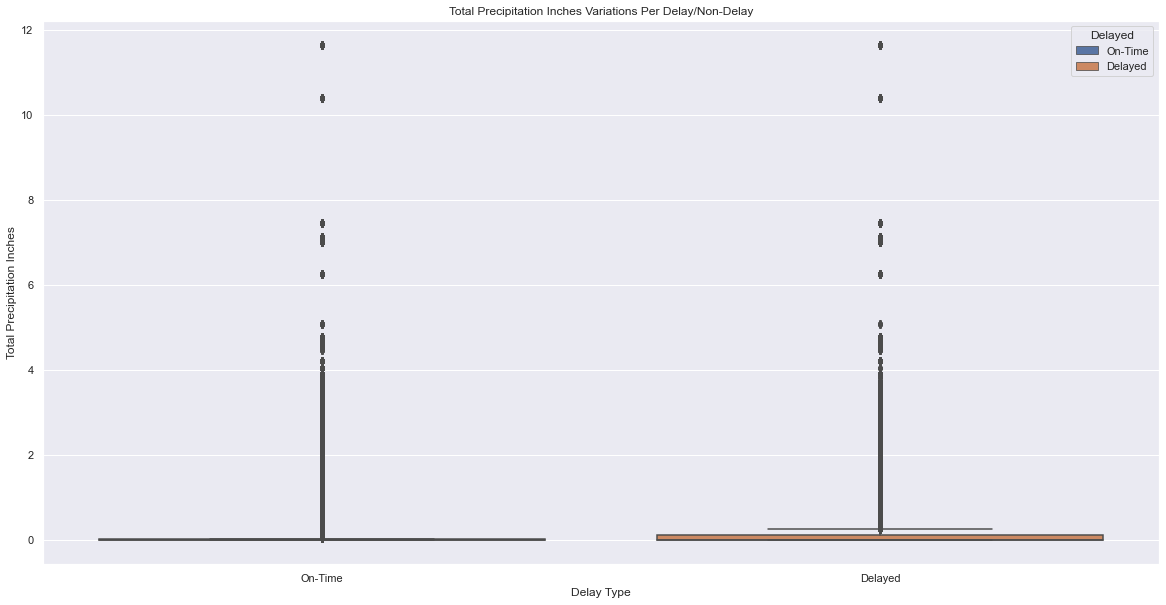

In [51]:
#Total Precipitation Accumulation Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="PRCP", hue="Delayed", 
            dodge=False).set(title='Total Precipitation Inches Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Total Precipitation Inches")

Text(0, 0.5, 'Total Snowfall Inches')

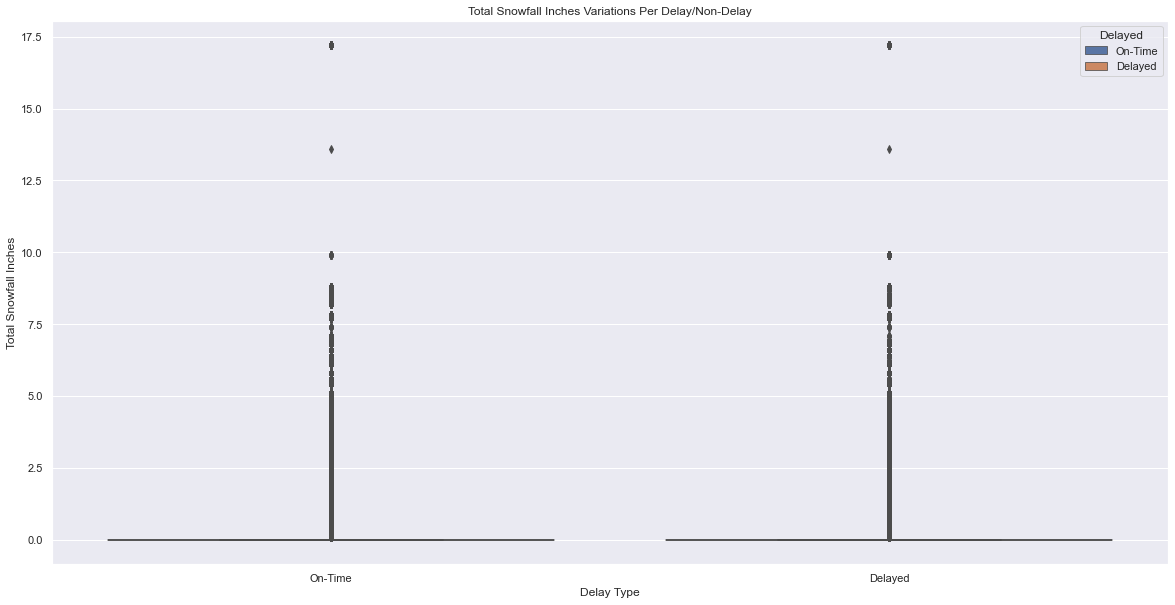

In [52]:
#Total Snowfall Accumulation Variations per delay type
MaxTempVar = sns.boxplot(data=df_aircraft, x="Delayed", y="SNOW", hue="Delayed", 
            dodge=False).set(title='Total Snowfall Inches Variations Per Delay/Non-Delay')
plt.xlabel("Delay Type")
plt.ylabel("Total Snowfall Inches")

In [90]:
df_aircraft.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

### Correlation Heatmap

In [91]:
#New dataframe for correlation
df_corr = df_aircraft[['DEP_DEL15', 'MONTH', 'DAY_OF_WEEK', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
                      'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
                      'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'PLANE_AGE', 'PRCP', 'SNOW', 'SNWD',
                      'TMAX', 'AWND']]

In [92]:
corr_final = df_corr.corr()
corr_final

,DEP_DEL15,MONTH,DAY_OF_WEEK,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
DEP_DEL15,1.000000,-0.019049,-0.000199,0.009028,0.011845,0.026740,0.003528,0.013711,0.024383,0.001257,0.006220,0.080277,0.050156,0.026129,-0.008936,0.050947
MONTH,-0.019049,1.000000,0.006727,0.022951,0.003155,0.036913,0.038884,0.018836,-0.002490,-0.004709,-0.017344,-0.005133,-0.053596,-0.088596,0.173454,-0.119272
DAY_OF_WEEK,-0.000199,0.006727,1.000000,-0.027214,0.009300,-0.001725,-0.006282,-0.002327,0.000075,-0.004934,-0.005785,0.018205,-0.005883,-0.009878,0.007513,0.001785
CONCURRENT_FLIGHTS,0.009028,0.022951,-0.027214,1.000000,-0.054131,0.849023,-0.043085,0.582488,0.808717,-0.017998,0.036077,-0.015074,-0.017250,-0.027321,0.026031,0.059272
NUMBER_OF_SEATS,0.011845,0.003155,0.009300,-0.054131,1.000000,0.003574,0.308104,0.161800,0.063401,0.557014,-0.102969,-0.014044,-0.008511,-0.015707,0.061254,-0.018506
AIRPORT_FLIGHTS_MONTH,0.026740,0.036913,-0.001725,0.849023,0.003574,1.000000,-0.019744,0.648140,0.967896,0.012987,0.027185,-0.010380,-0.009837,-0.032679,0.038819,0.071717
AIRLINE_FLIGHTS_MONTH,0.003528,0.038884,-0.006282,-0.043085,0.308104,-0.019744,1.000000,0.230914,-0.009631,0.902849,0.170682,-0.008108,-0.012901,-0.024357,0.076706,-0.047277
AIRLINE_AIRPORT_FLIGHTS_MONTH,0.013711,0.018836,-0.002327,0.582488,0.161800,0.648140,0.230914,1.000000,0.643257,0.290397,0.115853,-0.000840,-0.019745,-0.032805,0.067799,0.008097
AVG_MONTHLY_PASS_AIRPORT,0.024383,-0.002490,0.000075,0.808717,0.063401,0.967896,-0.009631,0.643257,1.000000,0.040953,0.026380,-0.015256,-0.004358,-0.025802,0.014953,0.069800
AVG_MONTHLY_PASS_AIRLINE,0.001257,-0.004709,-0.004934,-0.017998,0.557014,0.012987,0.902849,0.290397,0.040953,1.000000,0.216519,-0.005727,-0.007138,-0.018442,0.049718,-0.033686


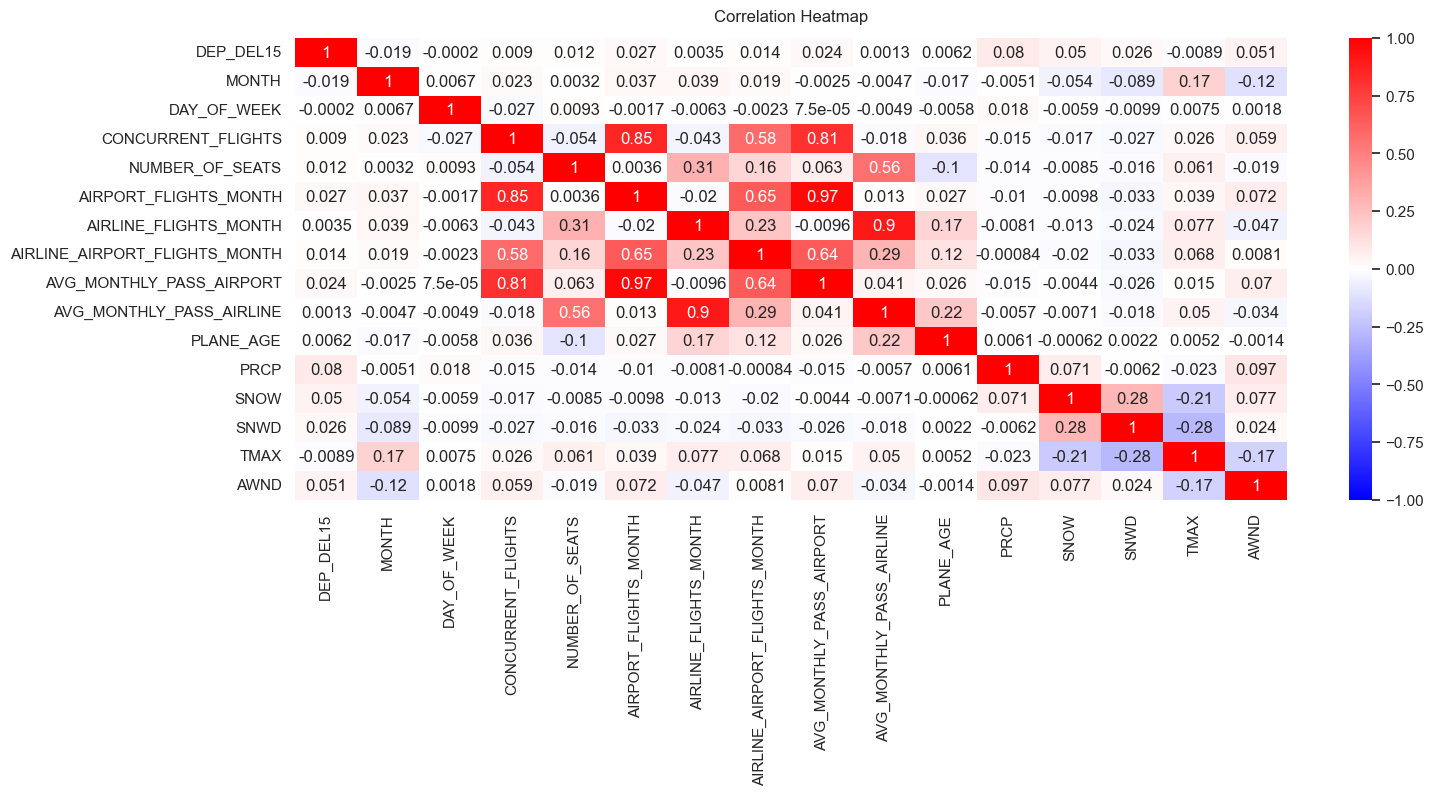

In [93]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr_final, vmin = -1, vmax = 1, annot = True, cmap = 'bwr')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

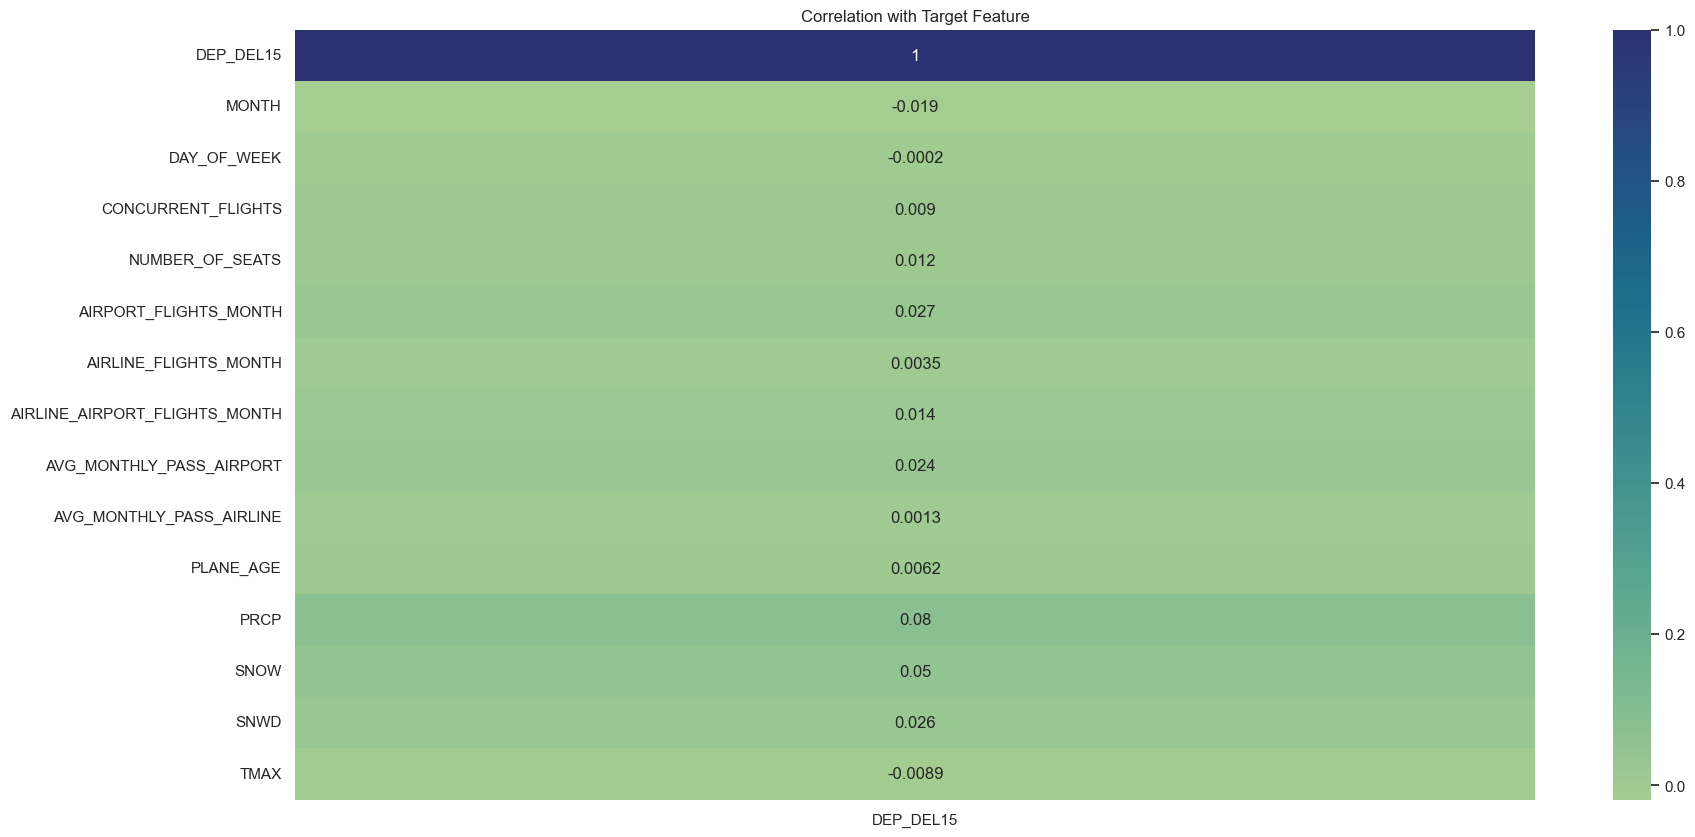

In [94]:
# Get the correlation of each feature with the target feature
target_corr = corr_final["DEP_DEL15"].iloc[:-1]
# Plot the target correlation as a heatmap
sns.heatmap(target_corr.to_frame(), annot = True, cmap = 'crest')
# Add a title
plt.title("Correlation with Target Feature")
# Show the plot
plt.show()

In [95]:
statistics.mean([1,2,3])

2

# PART 3:  Modeling

In [45]:
%%time
#   BACKUP DATA:
df3 = df1.copy()

#   PREPARE DATAFRAME:
#   SELECT SPECIFIC CARRIER:
df3 = df3.loc[(df1['CARRIER_NAME']   == 'Delta Air Lines Inc.') ]#|   #Delta
#                          (df3['CARRIER_NAME'] == 'Frontier Airlines Inc.') ]#| #Frontier  # Delta Air Lines Inc.
#                          (df3['CARRIER_NAME'] == 'JetBlue Airways') |        #JetBlue
#                          (df3['CARRIER_NAME'] == 'United Air Lines Inc.') |  #United Airlines
#                          (df3['CARRIER_NAME'] == 'American Airlines Inc.') | #American Airlines
#                          (df3['CARRIER_NAME'] == 'Southwest Airlines Co.')]  #Southwest


#   SELECT SPECIFIC AIRPORT:
df3 = df3.loc[(df3['DEPARTING_AIRPORT'] == 'Atlanta Municipal')]# | 
#                          (df3['DEPARTING_AIRPORT'] == 'Stapleton International')]# |    #Atlanta Municipal
#                          (df3['DEPARTING_AIRPORT'] == 'Dallas Fort Worth Regional') | 
#                          (df3['DEPARTING_AIRPORT'] == "Chicago O'Hare International") | 
#                          (df3['DEPARTING_AIRPORT'] == 'Los Angeles International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Phoenix Sky Harbor International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'McCarran International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Orlando International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Logan International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Douglas Municipal') | 
#                          (df3['DEPARTING_AIRPORT'] == 'San Francisco International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Minneapolis-St Paul International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'John F. Kennedy International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Friendship International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Newark Liberty International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'LaGuardia') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Chicago Midway International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Philadelphia International') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Detroit Metro Wayne County') | 
#                          (df3['DEPARTING_AIRPORT'] == 'Houston Intercontinental')]


#   SPECIFY PREDICTOR FIELDS:
X0 = df3.drop(
    [ 
    #'DEP_TIME_BLK'
    #, 'DISTANCE_GROUP'
    #, 'SEGMENT_NUMBER'
    #, 'CONCURRENT_FLIGHTS'
    #, 'NUMBER_OF_SEATS'
    #, 'CARRIER_NAME'
    'DEP_DEL15'
    #, 'AIRPORT_FLIGHTS_MONTH'
    #, 'AIRLINE_FLIGHTS_MONTH'
    #, 'AIRLINE_AIRPORT_FLIGHTS_MONTH'
    #, 'AVG_MONTHLY_PASS_AIRPORT'
    #, 'AVG_MONTHLY_PASS_AIRLINE'
    #, 'FLT_ATTENDANTS_PER_PASS'
    #, 'GROUND_SERV_PER_PASS'
    #, 'PLANE_AGE'
    #, 'DEPARTING_AIRPORT'
    , 'LATITUDE'
    , 'LONGITUDE'
    #, 'PREVIOUS_AIRPORT'
    #, 'PRCP'
    #, 'SNOW'
    #, 'SNWD'
    #, 'TMAX'
    #, 'AWND'
    #, 'DepartureHour'
    #, 'MonthName'
    #, 'DayOfWeekName'
    , 'Delayed' 
    ]
    , axis = 1)


#   SPLIT PREDICTOR AND OUTCOME VARIABLE:
y0 = df3['DEP_DEL15']


#   NORMALIZE QUANTITATIVE VARIABLES:
X0['CONCURRENT_FLIGHTS'] = X0['CONCURRENT_FLIGHTS']/max(X0['CONCURRENT_FLIGHTS'])-statistics.mean(X0['CONCURRENT_FLIGHTS'])
X0['NUMBER_OF_SEATS']    = X0['NUMBER_OF_SEATS']/max(X0['NUMBER_OF_SEATS'])-statistics.mean(X0['NUMBER_OF_SEATS'])

X0['FLT_ATTENDANTS_PER_PASS'] = X0['FLT_ATTENDANTS_PER_PASS']/statistics.mean(X0['FLT_ATTENDANTS_PER_PASS'])
X0['GROUND_SERV_PER_PASS'] = X0['GROUND_SERV_PER_PASS']/statistics.mean(X0['GROUND_SERV_PER_PASS'])
X0['PLANE_AGE'] = X0['PLANE_AGE']/statistics.mean(X0['PLANE_AGE'])

X0['PRCP'] = X0['PRCP']/statistics.mean(X0['PRCP'])
X0['SNOW'] = X0['SNOW']/statistics.mean(X0['SNOW'])
X0['TMAX'] = X0['TMAX']/statistics.mean(X0['TMAX'])
X0['AWND'] = X0['AWND']/statistics.mean(X0['AWND'])
X0.fillna(0, inplace = True)


#   INITIAL SPLIT TO REDUCE TOTAL NUMBER OF VARIABLES!
future_train_size = 50000
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size = future_train_size, random_state = 42)



CPU times: total: 2.97 s
Wall time: 2.97 s


In [22]:
#################################################################################################

In [46]:
%%time
#   MODEL 0:  Trivial Model:

#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()

#   SPLIT 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


num_late_flight = sum(y_test)
num_flight      = len(y_test)

rate_late       = num_late_flight/num_flight
rate_ontime     = 1- rate_late

print('On Time Rate:  ', rate_ontime)
print('Late Rate:     ', rate_late)

print('Trivial Model (no information): ', round(rate_ontime, 3)*100, '%.')
print('On Time:      ', num_flight - num_late_flight)
print('Not On Time:  ', num_late_flight)



On Time Rate:   0.8432
Late Rate:      0.1568
Trivial Model (no information):  84.3 %.
On Time:       8432
Not On Time:   1568
CPU times: total: 31.2 ms
Wall time: 21 ms


In [24]:
##################################################################################################

In [25]:
#################################################################################################
X_train.shape

(40000, 26)

In [47]:
%%time
#   MODEL 1:  Logistic Regression
#################################################################################################

#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:  
X_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT:  
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = .2, random_state = 42)


#   CREATE MODEL:  
reg = LogisticRegression()


#   FIT MODEL:  
reg.fit(X_train, y_train)


#   PREDICT WITH MODEL:  
y_pred1 = reg.predict(X_test)
#y_pred1a = reg.predict(X_train)
#X_test['pred1'] = y_pred1
#X_train['pred1'] = y_pred1a


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred1))
print('Recall:    ', recall_score(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred1))



Score:      0.8432
Recall:     0.0
Precision:  0.0

 [[8432    0]
 [1568    0]]
CPU times: total: 594 ms
Wall time: 595 ms


C:\Users\NewGuy1\anaconda31\envs\Python_and_R\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
%%time
#   MODEL 2:  Decision Tree
#################################################################################################

#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:
X_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT DATA:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = 0.2, random_state = 42)


#   CREATE MODEL:
dtc = DecisionTreeClassifier()


#   FIT MODEL:
dtc.fit(X_train, y_train)


#   PREDICT WITH MODEL:
y_pred2          = dtc.predict(X_test)


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred2))
print('Recall:    ', recall_score(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred2))



Score:      0.7838
Recall:     0.2914540816326531
Precision:  0.3030503978779841

 [[7381 1051]
 [1111  457]]
CPU times: total: 1.06 s
Wall time: 1.07 s


In [49]:
%%time
#   MODEL 3:  RandomForestClassifier
################################################################################################
#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:
X1_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT DATASET:  Train v. Test
X_train, X_test, y_train, y_test = train_test_split(X1_dummies, y, test_size = 0.2, random_state = 42)


#   CREATE MODEL:
rfc = RandomForestClassifier()


#   FIT MODEL:
rfc.fit(X_train, y_train)


#   PREDICT WITH MODEL:
y_pred3  = rfc.predict(X_test)


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred3))
print('Recall:    ', recall_score(y_test, y_pred3))
print('Precision: ', precision_score(y_test, y_pred3))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred3))



Score:      0.8549
Recall:     0.14221938775510204
Precision:  0.6778115501519757

 [[8326  106]
 [1345  223]]
CPU times: total: 8.19 s
Wall time: 8.19 s


In [50]:
%%time
#   MODEL 4:  SVM
################################################################################################
#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:
X_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT DATASET:  Train v. Test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = 0.2, random_state = 42)


#   CREATE MODEL:
svc = SVC()


#   FIT MODEL:
svc.fit(X_train, y_train)


#   PREDICT:
y_pred4          = svc.predict(X_test)


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred4))
print('Recall:    ', recall_score(y_test, y_pred4))
print('Precision: ', precision_score(y_test, y_pred4))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred4))



Score:      0.8432
Recall:     0.0
Precision:  0.0

 [[8432    0]
 [1568    0]]
CPU times: total: 1min 41s
Wall time: 1min 41s


C:\Users\NewGuy1\anaconda31\envs\Python_and_R\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
%%time
#   MODEL 5:  KNN
################################################################################################
#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:
X_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT DATASET:  Train v. Test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = 0.2, random_state = 42)


#   CREATE MODEL:
knn = KNeighborsClassifier(n_neighbors = 4)


#   FIT MODEL:
knn.fit(X_train, y_train)


#   PREDICT:
y_pred5  = knn.predict(X_test)


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred5))
print('Recall:    ', recall_score(y_test, y_pred5))
print('Precision: ', precision_score(y_test, y_pred5))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred5))



Score:      0.7924
Recall:     0.048484848484848485
Precision:  0.3333333333333333

 [[7828  192]
 [1884   96]]
CPU times: total: 30.9 s
Wall time: 1.43 s


In [36]:
%%time
#   MODEL 6:  Naive Bayes
################################################################################################
#   COPY X,Y  
X = X_test0.copy()
y = y_test0.copy()


#   PREPARE VARIABLES:
X_dummies = pd.get_dummies(X, drop_first = True) # get_dummies


#   SPLIT DATASET:  Train v. Test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size = 0.2, random_state = 42)

#   CREATE MODEL:
gnb = GaussianNB()


#   FIT MODEL:
gnb.fit(X_train, y_train)


#   PREDICT:
y_pred6 = gnb.predict(X_test)


#   EVALUATE RESULTS:  
print('Score:     ', accuracy_score(y_test, y_pred6))
print('Recall:    ', recall_score(y_test, y_pred6))
print('Precision: ', precision_score(y_test, y_pred6))
print('\n',          sklearn.metrics.confusion_matrix(y_test, y_pred6))



Score:      0.802
Recall:     0.0
Precision:  0.0

 [[8020    0]
 [1980    0]]
CPU times: total: 578 ms
Wall time: 569 ms


C:\Users\NewGuy1\anaconda31\envs\Python_and_R\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#    BACKUP!

#   Evaluate Accuracy and Confusion Matrix:
X_test['pred_all']  = 0
X_train['pred_all'] = 0

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred1'] 
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred1'] 
except:
    pass

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred2']
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred2'] 
except:
    pass

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred3']
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred3'] 
except:
    pass

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred4']
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred4'] 
except:
    pass

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred5']
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred5'] 
except:
    pass

try:
    X_test['pred_all'] = X_test['pred_all'] + X_test['pred6']
    X_train['pred_all'] = X_train['pred_all'] + X_train['pred6'] 
except:
    pass


X_test.loc[X_test['pred_all'] > 1] = 1
X_train.loc[X_train['pred_all'] > 1] = 1


y_pred_all = X_test['pred_all']


print(y_pred_all.shape)
print('Score: ', accuracy_score(y_test, y_pred_all))
print('\n', sklearn.metrics.confusion_matrix(y_test, y_pred_all))
confMatrix = sklearn.metrics.confusion_matrix(y_test, y_pred_all)
print(confMatrix[1,1]/(confMatrix[0,1] + confMatrix[1,1]))

